## Instruções Gerais
* Identifiquem no início do arquivo os integrantes do grupo (nome e matrícula)
* Por limitações do moodle, o nome do arquivo submetido não pode ter caracteres acentuados ou com cedilha
* Apenas um dos integrantes do grupo deve fazer a submissão no moodle
* Certifiquem-se de que o arquivo pode ser executado diretamente e sem dependências externas (Kernel > Restart & Run All)

# T1.1 Gender Inequality
### Integrantes:
* Hugo Cunha - 1610565
* Pedro Felipe - 1611074
* Renan Moreira - 1611061
* Yan Cunha - 1610886

Tivemos muita dificuldade com esse trabalho, não conseguimos achar praticamente nenhum dado. tivemos que pegar dados de varias fontes e tentar mesclar mas não funcionou muito bem e o unico que conseguimos usar foi esse que mostra 4 anos de levantamento nos estados dos EUA contendo:
* Year
* State_Name	
* High_School_Graduation	
* Income_Inequality_Gini_Index 
* Violent_Crime

Cada estado tem uma entrada por ano somando 200 entradas (nem todos os estados estão representados pois não tinham dados suficientes
Tentamos usar os algoritmos para prever os crimes violentos pegando como parametros de treino o Income_Inequality_Gini_Index  e High_School_Graduation. Mas ficou muito ruim, as previsões ficam muito longe e os dados parecem não ter relação nenhuma, ao ponto de não conseguirmos falar de um "melhor" algoritmo

In [1]:
from IPython.display import display, Markdown, Latex
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning libraries and functions
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Link dos dados utilizados nesse notebook. Arquivo texto, delimitado por vírgulas, sem cabeçalho
url_tab = 'https://raw.githubusercontent.com/Pedro-Magalhaes/Teste/master/T1_3/t3.csv'

In [2]:
# cria dataframe pandas com dados
url_tab = 'https://raw.githubusercontent.com/Pedro-Magalhaes/Teste/master/T1_3/t3.csv'
import pandas as pd
df = pd.read_csv(url_tab)

# obtendo as dimensões do data set
df.shape

# Resultado esperado (200,5)

(200, 5)

In [3]:
df.head(10)

,Year,State_Name,High_School_Graduation,Income_Inequality_Gini_Index,Violent_Crime
0,2015,Alabama,80.0,0.476,430.8
1,2015,Alaska,71.8,0.418,640.4
2,2015,Arizona,75.1,0.468,416.5
3,2015,Arkansas,84.9,0.471,460.3
4,2015,California,80.4,0.489,402.1
5,2015,Colorado,76.9,0.458,308.0
6,2015,Connecticut,85.5,0.501,262.5
7,2015,Delaware,80.4,0.449,491.4
8,2015,Florida,75.6,0.483,470.4
9,2015,Georgia,71.7,0.480,365.7


In [4]:
# ajusta os tipos das colunas numéricas

# função de conversão de strings para inteiros
def str_to_int(c):
    if isinstance(c, int):
        return c
    else:
        try:
            return int(c)
        except:
            return None
        
def str_to_float(c):
    if isinstance(c, float):
        return c
    else:
        try:
            return float(c)
        except:
            return None
        
# aplicamos a função a todas as colunas numéricas
df.Year = df.Year.apply(str_to_int)
df.High_School_Graduation = df.High_School_Graduation.apply(str_to_float)
df.Income_Inequality_Gini_Index = df.Income_Inequality_Gini_Index.apply(str_to_float)
df.Violent_Crime = df.Violent_Crime.apply(str_to_float)

Coefficients:      [  -2.10977753 1569.05565224]
Intercept:         -183.6616161680913
Mean squared error: 17596.27
Variance score:     -0.05
Variance score (baseline): -0.02


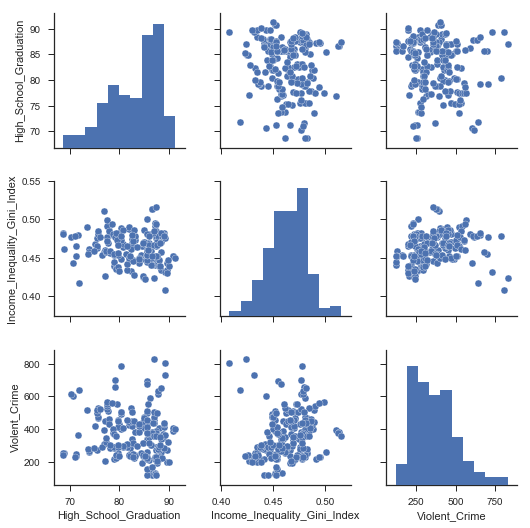

In [5]:


dfTrain, dfTest = train_test_split(df, test_size=0.2)

predictors = ['High_School_Graduation','Income_Inequality_Gini_Index']

X_train = np.array(dfTrain[predictors])
y_train = np.array(dfTrain.Violent_Crime)

X_test = np.array(dfTest[predictors])

y_test = np.array(dfTest.Violent_Crime)

# Create linear regression object
regr = sk.linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients:     ', regr.coef_)
print('Intercept:        ', regr.intercept_)

# The mean squared error (MSE)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:     %.2f' % r2_score(y_test, y_pred))


# considering only the mean values of y_train
print('Variance score (baseline): %.2f' % r2_score(y_test, [np.mean(y_train) for i in range(len(y_test))]))

sns.set(style="ticks")
sns.pairplot(df[predictors+['Violent_Crime']])

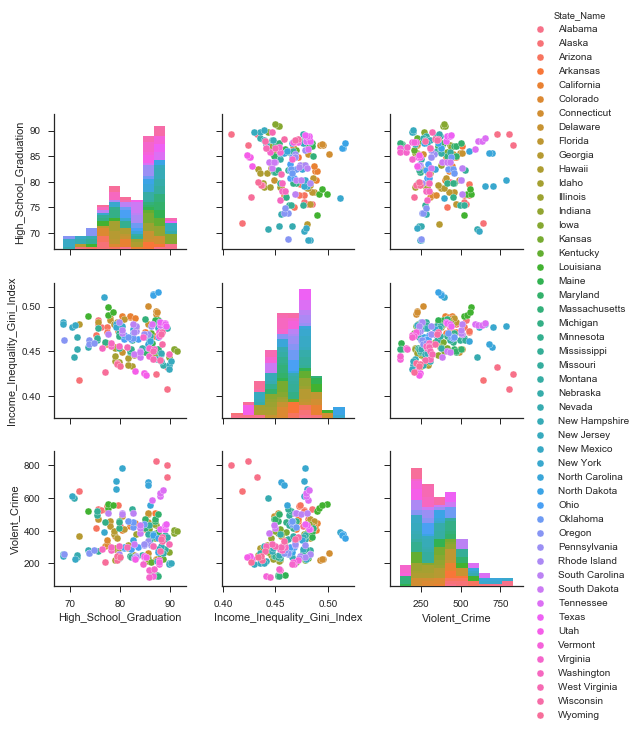

In [6]:
sns.set(style="ticks")
sns.pairplot(df[['State_Name','High_School_Graduation', 'Income_Inequality_Gini_Index', 'Violent_Crime']],hue='State_Name')

In [7]:
# Create linear regression object
regr = sk.linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print('Predictors:       ', predictors)

# The coefficients
print('Coefficients:     ', regr.coef_)
print('Intercept:        ', regr.intercept_)

# The mean squared error (MSE)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:     %.2f' % r2_score(y_test, y_pred))

print('Ajusted R^2')
SS_Residual = sum((y_test - y_pred)**2)
SS_Total = sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual)) / SS_Total
adjusted_r_squared = 1 - (1 - r_squared) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)
print (r_squared, adjusted_r_squared)

Predictors:        ['High_School_Graduation', 'Income_Inequality_Gini_Index']
Coefficients:      [  -2.10977753 1569.05565224]
Intercept:         -183.6616161680913
Mean squared error: 17596.27
Variance score:     -0.05
Ajusted R^2
-0.04556902034192123 -0.10208626468472781


In [8]:
# Create linear regression object
regr = sk.linear_model.Lasso(normalize=True)

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print('Predictors:       ', predictors)

# The coefficients
print('Coefficients:     ', regr.coef_)
print('Intercept:        ', regr.intercept_)

# The mean squared error (MSE)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score:     %.2f' % r2_score(y_test, y_pred))

Predictors:        ['High_School_Graduation', 'Income_Inequality_Gini_Index']
Coefficients:      [ -0.         939.68744637]
Intercept:         -65.9047583036405
Mean squared error: 17299.57
Variance score:     -0.03


In [9]:
from sklearn.model_selection import cross_val_score, cross_val_predict
import sklearn.metrics

X = df[predictors]
y = df.Violent_Crime
N_FOLDS = 5

scores = cross_val_score(regr, X, y, cv = N_FOLDS)
predicted = cross_val_predict(regr, X, y, cv = N_FOLDS)
sklearn.metrics.r2_score(y, predicted) 

print ('Cross-validated scores:', scores)

Cross-validated scores: [-0.01595449  0.00464079 -0.0432046   0.00121294  0.01639179]
